In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
trainset=torchvision.datasets.MNIST("./mnist/", train=True, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1528340.90it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 298715.47it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2957540.24it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1092221.58it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



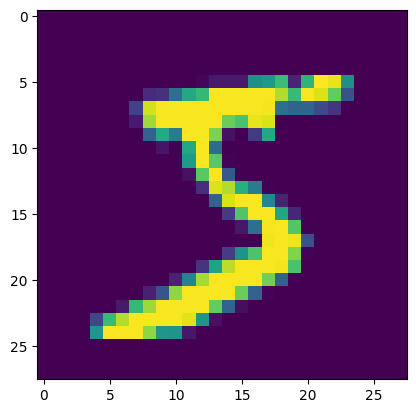

In [37]:
plt.imshow(trainset[0][0])

In [39]:
img0 = torch.flatten(transforms.ToTensor()(trainset[0][0]))
img1 = torch.flatten(transforms.ToTensor()(trainset[1][0]))

In [123]:
b0 = torch.sign(img0 - 0.5)
b1 = torch.sign(img1 - 0.5)

W = torch.outer(b0, b0) + torch.outer(b1, b1)
for i in range(2, 20):
    bn = torch.sign(torch.flatten(transforms.ToTensor()(trainset[i][0])))
    W += torch.outer(bn, bn)

In [124]:
b0_ = b0.clone()
b0_[28*14:]=0

b1_ = b1.clone()
b1_[28*14:]=0

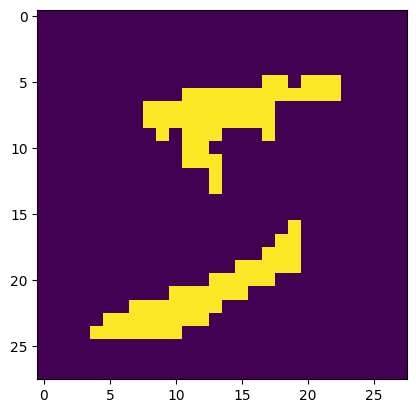

In [125]:
x = b0_
for i in range(1):
    x = torch.sign(W @ x)

plt.imshow(x.view(28,28))

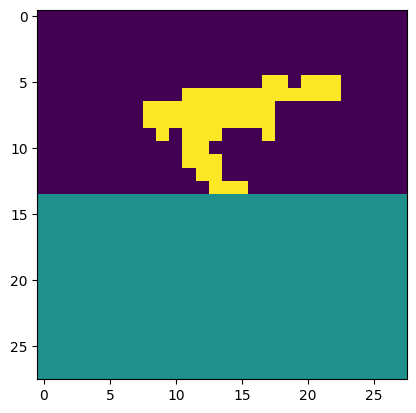

In [93]:
plt.imshow(b0_.view(28, 28))